<h1> <center>Transcriptome Validation Project</center></h1> 

### Authors: Sudha GC Upadhaya & David Linnard Wheeler     

## Objectives

- Validate the differences in gene experssion between symptomatic vs asymptomatic hosts
- Validate the differences in gene experssion of *Verticillium dahliae* isolates between symptomatic vs asymtomatic hosts

## Experimental design

- Treatment structure: 2 way factorial
- Independent variables: 
  - Two Hosts
    * Potato: cv. 'Russet Burbank'
    * Brown mustard: cv. 'ISCI 99'
  - Three Fungi
    - *𝑉𝑒𝑟𝑡𝑖𝑐𝑖𝑙𝑙𝑖𝑢𝑚 𝑑𝑎ℎ𝑙𝑖𝑎𝑒*-653 (Virulent in potato and avirulent in mint)
    - *𝑉𝑒𝑟𝑡𝑖𝑐𝑖𝑙𝑙𝑖𝑢𝑚 𝑑𝑎ℎ𝑙𝑖𝑎𝑒*-111 (Virulent in mint and avirulent in potato)
    -  Non-inoculated control (Water only)
       
- Sample collection: 10 days after inoculation
- Three replicates
- Design structure: Randomized complete Block Design 
- Observational unit: plant
- Experimental unit: plant
- Samples: whole plants
- Data
    - RNA quantity
    - Fold change
- Analysis: 
   - delta-delta ct method
   - correlation

## Material and Methods

  **Greenhouse trial**
* Inoculum preparation for root dips (3.5"pot):
 * Inoculum for isolates 653 and 111:
   * 60 plants/3 isolates = 20 plants/isolate 
   * 100 ml/plant (Dung et al. 2010) = 2000 ml = 2 L inoculum/isolate
   * 2 L of 10 conidia/ml inoculum is needed per isolate
   * 2 L/200 ml/flask = 10 flasks/isolate 
* Trial planting date: 8/21/2020
* Trial inoculation date: 9/2/2020 
* Sample collection date : 9/12/2020 potato and mustards harvest @ 10 dpi


**Gene expression validation**
* RNA extraction: Crude method (Kumar et al. 2007)
* RNA quantification: QUBIT Flurometer
* RNA integrity check: Gel electorophoresis
* cDNA synthesis: VWR cDNA supermix
   * 6 µl of ~1µg total RNA + 4 µl supermix + 10 µl water
   * Incubate: 5 min at 25°C +30 min at 42°C + 5 min at 85°C and hold at 4°C
   * Dilute cDNA to 1/5th
   * Store at -20°C
* Primer design: 
   * 19 to 23 bp
   * Product size: 70 to 210 bp
   * GC content: 35% to 65%
   * Spanning exon-exon junction (if applicable)
* RTPCR
  * Reaction mixture (10µl): 
     * SYBR Select Mix(2X): 5µl
     * Forward primer (10µM): 0.5µl
     * Reverse primer (10µM): 0.5µl
     * H20: 3µl
     * cDNA template: 1µl

  * RT-PCR cycling condition:
     * Initial denaturation 95°C for 10 min
     * 40 cycles   95°C for 15 sec;
     * 40 cycles   62°C for 1 min; 
     * Followed by 60 cycles of temperature increasing from 60°C to 95°C with fluorescence readings     acquired at 0.5°C 
        increment per cycle. 
   * Internal control: Housekeeping gene for normalization
   * Negative control: No template
   * Three technical replications
   * Three biological replications
   * Check melting curve for the presence of single amplified product
* Calculate Ct values for samples using LinRegPCR software
* Calculate primer efficiency using LinRegPCR (Ruijter et al. 2009)
* Calculate log2foldchange using delta-delat Ct methond (Livak et al. 2001)
   * $∆∆Ct = ∆Ct (Treatment) – ∆Ct (Control)$
   * $Fold change = 2^-(∆∆Ct)$

### Data Analysis/Visualization

In [1]:
getwd()#get working directory

[1] "C:/Users/sudha.gcupadhaya/Desktop/RNA-seq/Validation project/Data and Script"

In [16]:
library(tidyr)#data wrangling
library(ggplot2)# plotting
library(ggthemes)#themes
library(ggpubr)#gather function
library(dplyr)

In [4]:
df<- read.csv('qpcr.csv')#import data

In [5]:
tail(df)

,ID,Host,Gene,comparision,Replication,qPCR,RNASeq
85,Vd-1,Verticillium dahliae,Vd_mRNA_1341,Bj(653) vs St(653),1,2.01,5.2
86,Vd-1,Verticillium dahliae,Vd_mRNA_1341,Bj(653) vs St(653),2,3.05,5.2
87,Vd-1,Verticillium dahliae,Vd_mRNA_1341,Bj(653) vs St(653),3,1.9,5.2
88,Vd-3,Verticillium dahliae,Vd_AYG1_ASPFU,Bj(111) vs St(111),1,-0.34,-1.1
89,Vd-3,Verticillium dahliae,Vd_AYG1_ASPFU,Bj(111) vs St(111),2,-0.48,-1.1
90,Vd-3,Verticillium dahliae,Vd_AYG1_ASPFU,Bj(111) vs St(111),3,-1.56,-1.1


In [6]:
str(df)

'data.frame':	90 obs. of  7 variables:
 $ ID         : Factor w/ 21 levels "Bj-10","Bj-11",..: 3 3 3 3 3 3 4 4 4 4 ...
 $ Host       : Factor w/ 4 levels "Brassica juncea",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Gene       : Factor w/ 30 levels "Bj_Cluster-15354.44072-1",..: 3 3 3 4 4 4 5 5 5 6 ...
 $ comparision: Factor w/ 6 levels "111 vs 653","111 vs control",..: 3 3 3 1 1 1 3 3 3 2 ...
 $ Replication: int  1 2 3 1 2 3 1 2 3 1 ...
 $ qPCR       : Factor w/ 86 levels "-0.19","-0.34",..: 36 16 44 79 68 74 67 77 70 75 ...
 $ RNASeq     : num  -6.2 -6.2 -6.2 6.2 6.2 6.2 3 3 3 3.5 ...


In [7]:
df$Replication <- as.factor(df$Replication)#change numeric data to factor
df$qPCR <- as.numeric(as.character(df$qPCR))#change factor to numeric
df$Host <- factor(df$Host, levels= c('Brassica juncea','Solanum tuberosum', 'Mentha x piperita','Verticillium dahliae'),
                 labels = c('B. juncea', 'S. tuberosum', 'M. x piperita', 'V. dahliae'))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [8]:
df[!complete.cases(df),]# find data with NA 
df<- df[!is.na(df$qPCR),]#subset data excluding NAs

,ID,Host,Gene,comparision,Replication,qPCR,RNASeq
64,St-11,S. tuberosum,St_TIF5A_ARATH,111 vs 653,1,NA,1.8


In [9]:
df1<- gather(df, method, foldchange, qPCR:RNASeq)#gather data to longer format

In [10]:
head(df1,4)

ID,Host,Gene,comparision,Replication,method,foldchange
Bj-3,B. juncea,Bj_Cluster-15354.86688-1,653 vs control,1,qPCR,-2.12
Bj-3,B. juncea,Bj_Cluster-15354.86688-1,653 vs control,2,qPCR,-1.36
Bj-3,B. juncea,Bj_Cluster-15354.86688-1,653 vs control,3,qPCR,-2.49
Bj-3,B. juncea,Bj_Cluster-15354.86688-2,111 vs 653,1,qPCR,2.69


In [11]:
#rename the qpcr and RNAseq column
method.labs <- c("qRT-PCR", "RNA-Seq")
names(method.labs) <- c("qPCR", "RNASeq")

---

#### Boxplot

In [12]:
#tiff('Boxplot.tiff',width=17,height=14,units='in',res=300)
Boxplot = ggplot(df1, aes(x= Gene, y= foldchange, fill = comparision))+
    geom_boxplot(aes(fill =comparision),alpha=1,lwd=0.6)+geom_hline(yintercept = 0, alpha = 0.5)+
    geom_jitter(size=4,pch=20,alpha = 0.5)+
    theme_bw()+
    scale_fill_manual(values = c("#56B4E9","#D55E00","#CC79A7","#009E73","#F0E442","#999999"))+
    facet_grid(method~Host, scales ='free', labeller = labeller (method =method.labs))+
    labs(title ='', x = 'Gene', y =expression(log[2]~fold~change))+
    theme(axis.title.x= element_text(size =26, color ='black'),
    axis.title.y = element_text(size =26, color ='black'),
    axis.text.x = element_text(vjust =0.5, size =18,angle =90,color = 'black'),
    axis.text.y = element_text(size =24, color = 'black'),
    strip.text.x = element_text(size = 26, face = 'italic'),
    strip.text.y = element_text(size = 26),
    legend.text = element_text(size =20),
    legend.title = element_text(size =20),
    legend.key.size = unit(1.5, 'cm'))+
    theme(legend.position="bottom")+
    guides(fill = guide_legend('Comparision', override.aes = list(alpha =1))) 
Boxplot
#dev.off()

png 
  2

In [17]:
df_summary <- df %>% 
                group_by (Gene, comparision, Host) %>% 
                summarise(Avg_qPCR = mean(qPCR), na.rm = T,
                          Avg_RNASeq = mean(RNASeq),
                          sd_qpcr = sd(qPCR), na.rm = T,
                          sd_rnaseq = sd(RNASeq))#calculate mean and sd qpcr foldchange for each gene
df_summary<- df_summary[,c(-5,-8)]#remove fifth and eighth rows
cor(x=df_summary[,4], y=df_summary[,5])#correlation coefficient

`summarise()` regrouping output by 'Gene', 'comparision' (override with `.groups` argument)


,Avg_RNASeq
Avg_qPCR,0.8791271


In [18]:
head(df_summary,4)

Gene,comparision,Host,Avg_qPCR,Avg_RNASeq,sd_qpcr
Bj_Cluster-15354.44072-1,111 vs control,B. juncea,-2.366667,-4.4,0.7559321
Bj_Cluster-15354.44072-2,111 vs 653,B. juncea,-2.513333,-4.9,0.7556675
Bj_Cluster-15354.86688-1,653 vs control,B. juncea,-1.990000,-6.2,0.5761076
Bj_Cluster-15354.86688-2,111 vs 653,B. juncea,2.226667,6.2,0.5101307


#### Scatter plot (All hosts combined)

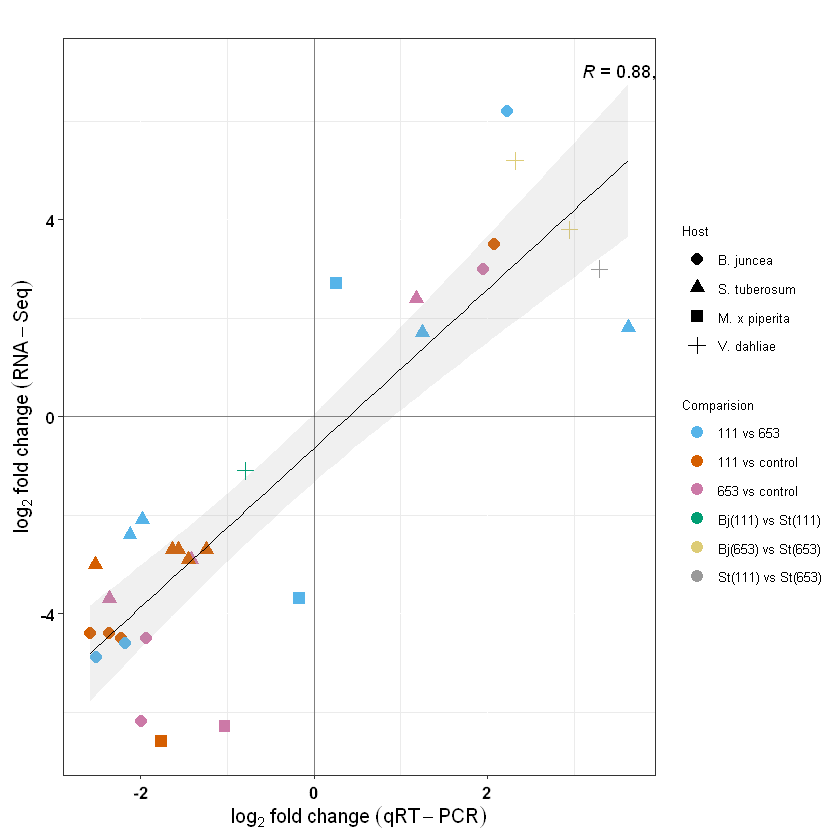

In [29]:
#tiff('scatterplot.tiff',width=7,height=5,units='in',res=300)
scatterplot<-ggplot(df_summary, aes(x = Avg_qPCR, y = Avg_RNASeq))+
          geom_point( aes(colour= comparision, shape = Host),size = 3,  alpha =1)+
          stat_cor(method = "pearson", label.x =3.1, label.y = 7)+
          geom_vline(xintercept = 0, alpha = 0.5)+
          geom_hline(yintercept = 0, alpha = 0.5)+
          geom_smooth(method = 'lm', se = T, alpha =0.15, size = 0.4, color = 'black')+
          scale_colour_manual(values = c("#56B4E9","#D55E00","#CC79A7","#009E73","#DDCC77","#999999"))+
          labs(title ='', x =expression(log[2]~fold ~change~(qRT-PCR)) , y = expression(log[2]~fold ~change~(RNA-Seq)))+
          theme_bw()+theme(panel.grid.major=element_line(colour="white"))+
          theme(axis.title.x= element_text(size =12, color ='black', face ='bold'),
              axis.title.y = element_text(size =12, color ='black', angle = 90,, face ='bold'),
              axis.text.x = element_text(vjust =0.5, size =10,angle =1,color = 'black', face='bold'),
              axis.text.y = element_text(size =10, color = 'black', face ='bold'),
              legend.text = element_text(size =8),
              legend.title = element_text(size =8))+
              guides(color = guide_legend('Comparision'), shape = guide_legend('Host'))
            
scatterplot
#dev.off() 

#### Scatter plot (Hosts separate)

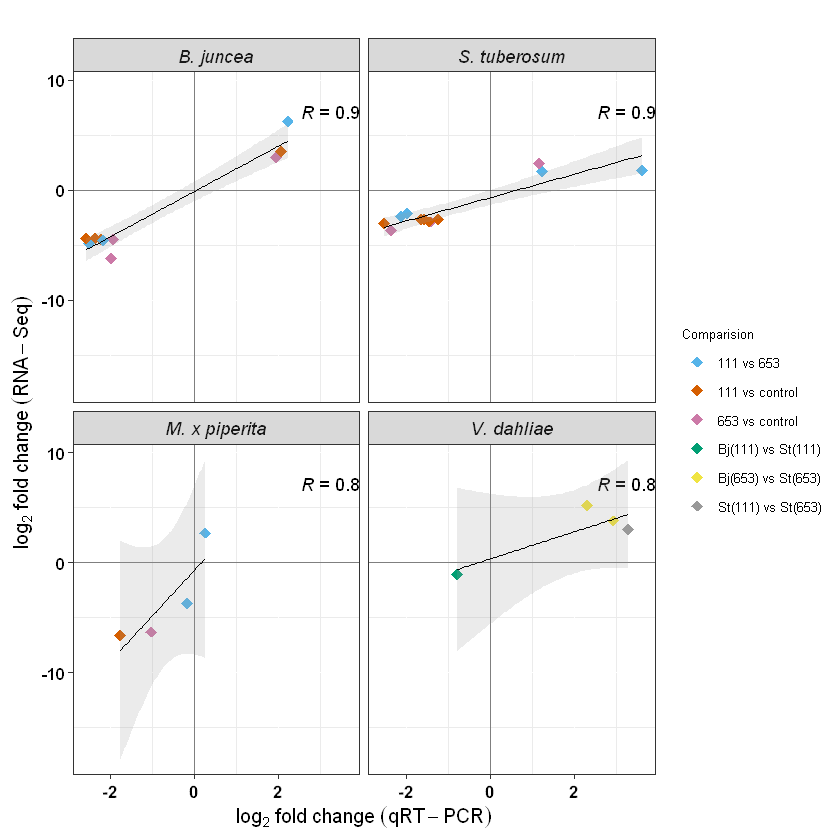

In [30]:
#tiff('scatterplot_separate.tiff',width=8,height=6,units='in',res=300)
scatterplot_separate<-ggplot(df_summary, aes(x = Avg_qPCR, y = Avg_RNASeq))+
          geom_point(aes(colour = comparision), size = 3, pch =18, alpha =1)+
          stat_cor(method = "pearson", label.x =2.55, label.y = 7)+theme(legend.position="bottom")+
          geom_vline(xintercept = 0, alpha = 0.5)+
          geom_hline(yintercept = 0, alpha = 0.5)+
          geom_smooth(method = 'lm', se = T, alpha =0.2, size = 0.55, color = 'black')+
          scale_colour_manual(values = c("#56B4E9","#D55E00","#CC79A7","#009E73","#F0E442","#999999"))+
          labs(title ='', x =expression(log[2]~fold ~change~(qRT-PCR)) , y = expression(log[2]~fold ~change~(RNA-Seq)))+
          theme_bw()+theme(panel.grid.major=element_line(colour="white"))+
          theme(axis.title.x= element_text(size =12, color ='black', face ='bold'),
            axis.title.y = element_text(size =12, color ='black', angle = 90,, face ='bold'),
            axis.text.x = element_text(vjust =0.5, size =10,angle =1,color = 'black', face='bold'),
            axis.text.y = element_text(size =10, color = 'black', face ='bold'),
            legend.text = element_text(size =8),
            legend.title = element_text(size =8),
            strip.text = element_text(size = 11, face = 'italic'))+
        guides(color = guide_legend('Comparision'))+
        facet_wrap(Host~., scales ='fixed')
scatterplot_separate
#dev.off() 

#### Extra V. dahliae genes (Mint 111 vs Mint 653)

In [38]:
df_Vd <- read.csv('Vd_genes_mint.csv')
str(df_Vd)
df_Vd$Replication<- factor(df_Vd$Replication)

'data.frame':	28 obs. of  5 variables:
 $ Host       : Factor w/ 2 levels "Verticillium dahliae",..: 1 2 1 2 1 2 1 2 1 2 ...
 $ Gene       : Factor w/ 7 levels "ARP2_ASPFU","AYG1_ASPFU",..: 4 4 4 4 4 5 5 5 5 6 ...
 $ comparision: Factor w/ 1 level "Mp(111) vs Mp(653)": 1 1 1 1 1 1 1 1 1 1 ...
 $ Replication: int  1 2 3 4 5 1 2 3 4 1 ...
 $ foldchange : num  -1.68 -2.07 -0.94 -0.62 -1.55 0.31 -0.24 -0.36 -0.37 -2.56 ...


In [58]:
tiff('Boxplot_Vd.tiff',width=5,height=5,units='in',res=300)
Boxplot_Vd = ggplot(df_Vd, aes(x= Gene, y= foldchange))+
    geom_boxplot( fill='#999999',alpha=0.5,lwd=0.6)+geom_hline(yintercept = 0, alpha = 0.5)+
    geom_jitter(size=3,pch=20,alpha = 0.3)+
    theme_bw()+
    labs(title ='', x = 'Gene', y =expression(log[2]~fold~change))+
    theme(axis.title.x= element_text(size =12, color ='black'),
    axis.title.y = element_text(size =12, color ='black'),
    axis.text.x = element_text(vjust =0.5, size =10,angle =60,color = 'black'),
    axis.text.y = element_text(size =10, color = 'black'))
Boxplot_Vd
dev.off()

png 
  2

#### Lollipop(RNAseq only)

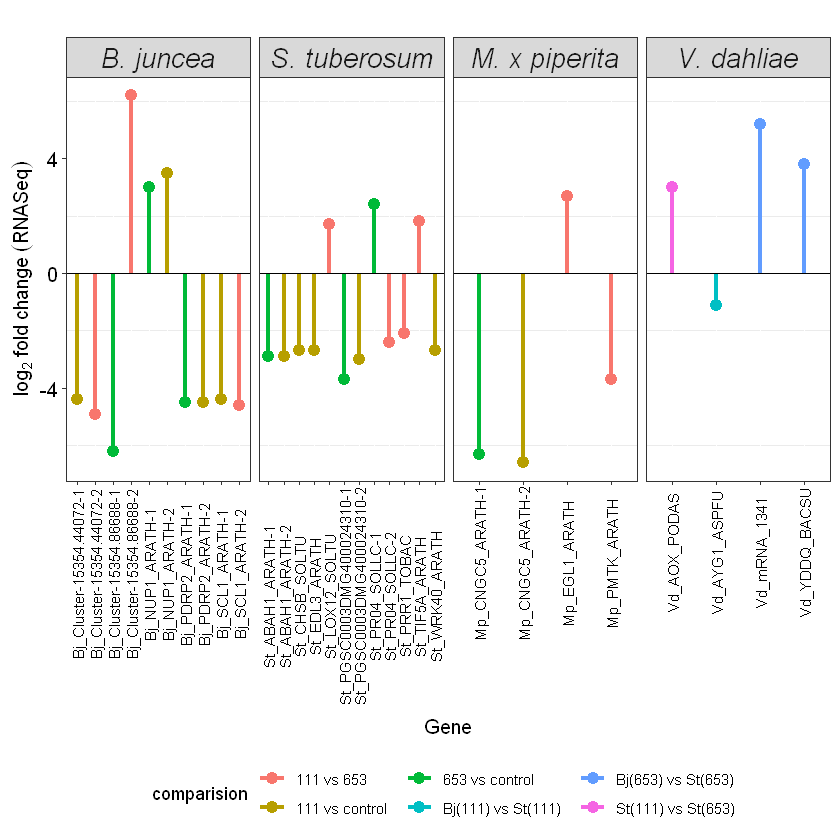

In [31]:
#tiff('lollipop_RNASeq.tiff',width=10,height=7,units='in',res=300)
lollipop_RNASeq<-ggplot(df_summary, aes(x = Avg_RNASeq, y = Gene,color = comparision)) +
        geom_segment(aes(x = 0, y = Gene, xend = Avg_RNASeq, yend = Gene), size =1.2) +
        geom_point(stat='identity', size=3)+ theme_bw()+
        geom_vline(xintercept = 0)+
        scale_fill_manual(values = c("cyan3", "brown1", "chartreuse3","cornflowerblue", "darkorchid", "deeppink"))+
       labs( title = "", x = expression(log[2]~fold ~change~(RNASeq)), y = 'Gene')+
  theme(panel.grid.major=element_line(colour="white"))+
  theme(plot.title = element_text(size =12,
                                    face ="bold",
                                    color = 'black',
                                    hjust = 0.5),
          axis.title.x= element_text(size =12, color ='black'),
          axis.title.y = element_text(size =12, color ='black', angle = 90 ),
          axis.text.x = element_text(vjust =0.5, size =9,angle =90,color = 'black'),
         strip.text.x = element_text(size = 16, face = 'italic'),
          axis.text.y = element_text(size =12, color = 'black'))+
          guides(shape = guide_legend('Comparision'))+theme(legend.position="bottom")+
facet_grid(~Host, scales ='free')+ coord_flip()
lollipop_RNASeq
#dev.off()

#### Bar graph

Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


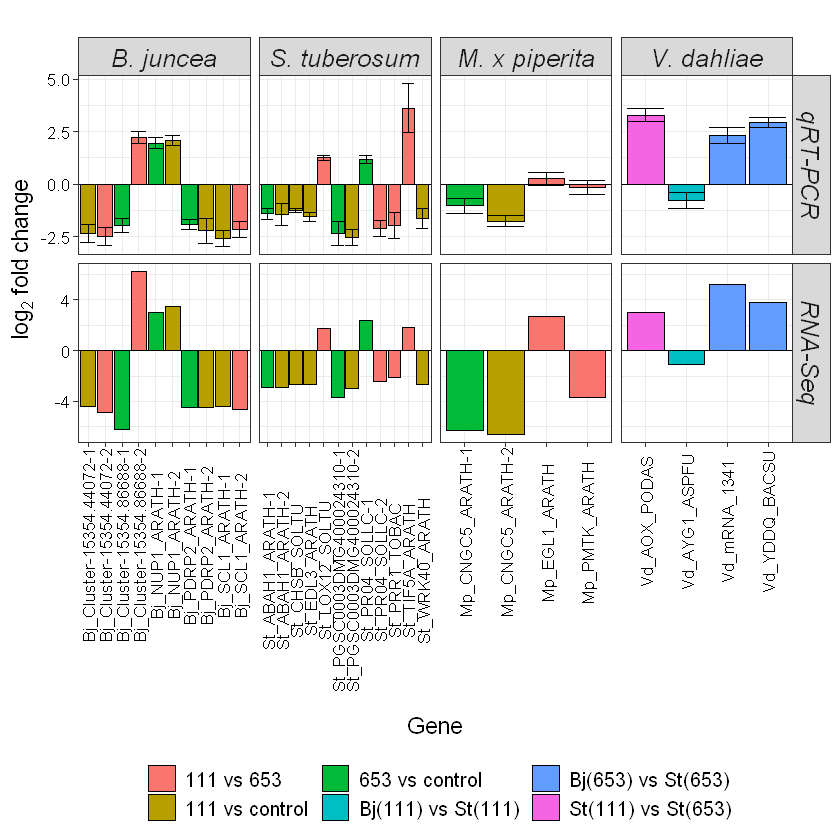

In [32]:
#tiff('Bargraph.tiff',width=11,height=8,units='in',res=300)
Bargraph = ggplot(df1, aes(x= Gene, y= foldchange, fill = comparision))+
            geom_hline(yintercept = 0)+
        stat_summary(geom = "bar", fun = mean, position = "dodge", colour ='black') +
        stat_summary(geom = "errorbar", fun.data = mean_se, position = "dodge")+
       theme_bw()+
       labs(title ='', x = 'Gene',  y =expression(log[2]~fold~change))+
       theme(plot.title = element_text(size =12, face ="bold", color = 'black', hjust = 0.5),
          axis.title.x= element_text(size =14, color ='black'),
          axis.title.y = element_text(size =14, color ='black'),
          axis.text.x = element_text(vjust =0.5, size =10,angle =90,color = 'black'),
          axis.text.y = element_text(size =10, color = 'black'), 
          legend.text = element_text(size =12),
          strip.text = element_text(size = 15, face = 'italic')) +
          guides(fill = guide_legend(''))+theme(legend.position="bottom")+
        facet_grid(method~Host, scales ='free',labeller = labeller (method =method.labs))
Bargraph
#dev.off()

---

## Folchange calculation by replications RNA seq (*Solanum tuberosum*)

In [ ]:
library("DESeq2")
library("DEFormats")
library("dplyr")
library("ggplot2")

In [ ]:
DF<- read.csv('Solanum_reads.csv')#load read count data

In [ ]:
DF_1 <- data.frame(DF[,-1], row.names = DF[,1])#change to dataframe
df = data.matrix(DF_1)

In [ ]:
group = rep(c("653", "111", "Control"), each = 3) # create vector 'group'

In [ ]:
dge = DGEList(df, group = group) #assign group


In [ ]:
dds = as.DESeqDataSet(dge)# Set data in Deseqformat

In [ ]:
dds <- dds[rowSums(counts(dds)) > 1, ]#exclude the count data if rowsum is less than 1

In [ ]:
DESeq.ds<- estimateSizeFactors(dds)
sizeFactors(DESeq.ds)

In [ ]:
colData(DESeq.ds)

In [ ]:
normalized_counts<- counts(DESeq.ds, normalized = TRUE)
normalized_counts

In [ ]:
log_norm_counts <-  log2(normalized_counts + 1)


In [ ]:
genes<- c("PGSC0003DMG400023922", "PGSC0003DMG402018475", "PGSC0003DMG400024310", "PGSC0003DMG400020999",
          "PGSC0003DMG400004259", "PGSC0003DMG400029620", "PGSC0003DMG400042481", "PGSC0003DMG400019824",
          "PGSC0003DMG400001178") #validated gene list

In [ ]:
Solanum_norm_count<- (log_norm_counts)[genes,]#subset only validated genes

In [ ]:
Solanum_norm_count

In [ ]:
Solanum_trt = c('653-1', '653-2','653-3','111-1','111-2','111-3','control-1','control-2','control-3')

In [ ]:
colnames(Solanum_norm_count)<- Solanum_trt

In [ ]:
write.csv(Solanum_norm_count,'C:/Users/sudha.gcupadhaya/Desktop/RNA-seq/qPCR validation/Solanum.csv' )

##### Tried to calculate foldchage by replicates in normalized data manually but it doesn't produce same foldchange values as DESeq2 does. DSEq2 uses regression model to every single gene to estimate fold change following: $Y = b0+b1*x+e$ (Love et al. 2014)

### Mis

In [11]:
df_1<- read.csv('opposite.csv')
str(df_1)
library(ggplot2)

'data.frame':	36 obs. of  4 variables:
 $ Gene       : Factor w/ 6 levels "Bj_Cluster-15354.91015-1",..: 6 6 6 5 5 5 3 3 3 4 ...
 $ comparision: Factor w/ 3 levels "111 vs 653","111 vs control",..: 3 3 3 3 3 3 3 3 3 2 ...
 $ method     : Factor w/ 2 levels "qPCR","RNA-Seq": 1 1 1 1 1 1 1 1 1 1 ...
 $ foldchange : num  -1.51 -0.22 -1.3 -0.16 -0.17 -0.48 -0.28 0.69 -1.19 0.7 ...


In [12]:
method.labs <- c("qRT-PCR", "RNA-Seq")
names(method.labs) <- c("qPCR", "RNA-Seq")

##### Opposite results (Potato, mustard)

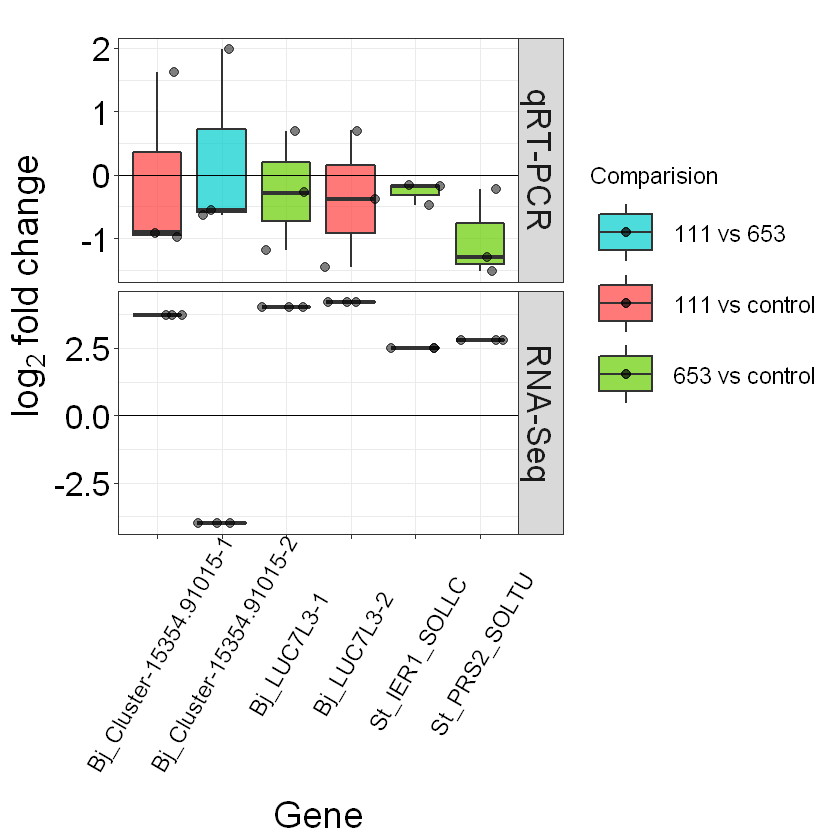

In [29]:
#tiff('Boxplot_opposite.tiff',width=10,height=8,units='in',res=300)
Boxplot_opposite = ggplot(df_1, aes(x= Gene, y= foldchange, fill = comparision))+
    geom_boxplot(aes(fill =comparision),alpha=0.7,lwd=0.6)+geom_hline(yintercept = 0)+
    geom_jitter(size=4,pch=20,alpha = 0.5)+
    theme_bw()+
    scale_fill_manual(values = c("cyan3", "brown1", "chartreuse3"))+
    facet_grid(method~., scales ='free', labeller = labeller (method =method.labs))+
    labs(title ='', x = 'Gene', y =expression(log[2]~fold~change))+
    theme(axis.title.x= element_text(size =22, color ='black'),
    axis.title.y = element_text(size =22, color ='black'),
    axis.text.x = element_text(vjust =0.55, size =14,angle =60,color = 'black'),
    axis.text.y = element_text(size =20, color = 'black'),
    strip.text.y = element_text(size = 20),
    legend.text = element_text(size =14),
    legend.title = element_text(size =14),
    legend.key.size = unit(1.5, 'cm'))+
    guides(fill = guide_legend('Comparision', override.aes = list(alpha =0.7))) 
Boxplot_opposite
#dev.off()